In [149]:
%matplotlib inline
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
filename = r'/Users/fanchang/Downloads/PAM4_100G_N092_855RX_Muffin.xyz'
rows = 631
cols = 480
image = np.zeros((rows, cols), dtype=float)
fp = open(filename, 'r')
count = 0
for line in fp:
    temp = line.rstrip('\n').split(' ')
    count +=1
    if count > 14:
        if len(temp)== 3:
#             print(count, temp[0], temp[1], temp[2].rstrip('\r'))
            image[int(temp[0]), int(temp[1])] = float(temp[2].rstrip('\r'))
fp.close()

In [3]:
np.savetxt('/Users/fanchang/Downloads/bing_test.csv', image, fmt='%.18e', delimiter=',', newline='\n')

In [10]:
np.max(image)

21.661983

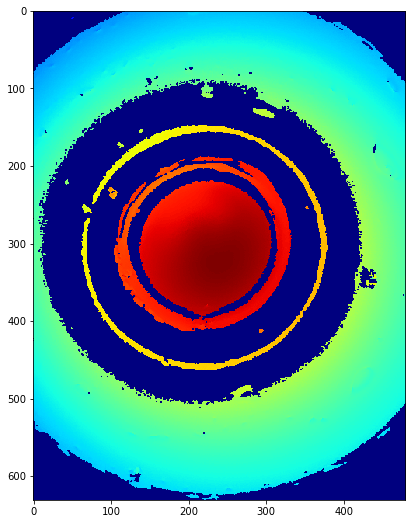

In [5]:
plt.figure(figsize=(12, 9))
plt.imshow(image, cmap='jet');

In [6]:
np.mean(image)

6.67773541505811

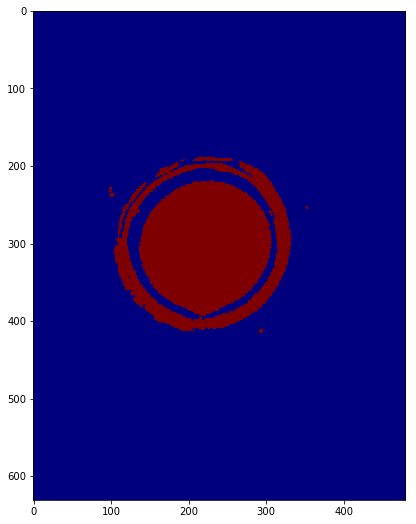

In [15]:
plt.figure(figsize=(12, 9))
plt.imshow(image>=16, cmap='jet')

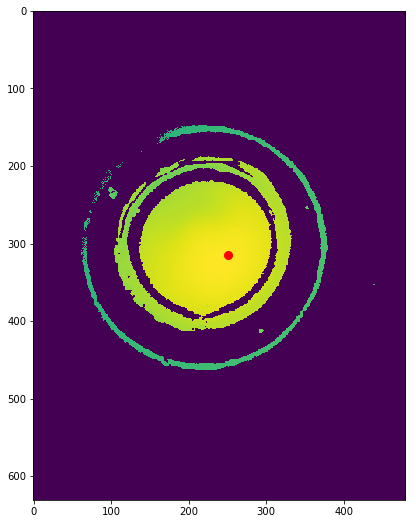

In [62]:
plt.figure(figsize=(12, 9))
plt.imshow(image*(image>=14))
plt.plot(250, 315, 'ro', markersize=8)

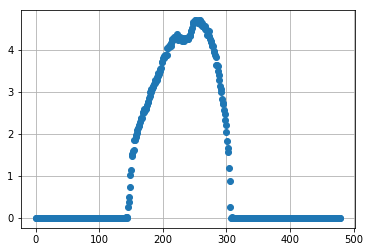

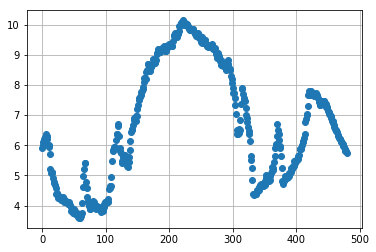

In [88]:
plt.figure()
plt.plot(np.mean(image*(image>=20), axis=0), 'o');
plt.grid()
plt.figure()
plt.plot(np.mean(image, axis=0), 'o');
plt.grid()

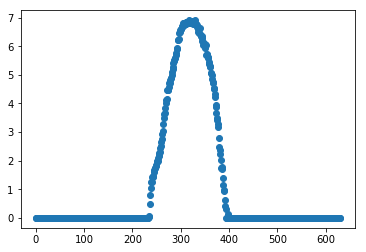

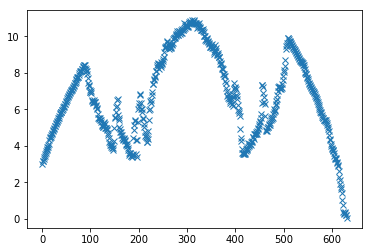

In [87]:
plt.figure()
plt.plot(np.mean(image*(image>=20), axis=1), 'o');
plt.
plt.figure()
plt.plot(np.mean(image, axis=1), 'x');

In [74]:
def centroid_coor(two_dim):
    coor = np.zeros((1, 2))
    for direction in [0, 1]: # horizontal 0 and vertical 1 
        temp = np.mean(two_dim, axis=direction)
        coor[0, direction] = np.dot(temp, np.arange(1, len(temp)+1))/np.sum(temp)
    return coor

In [76]:
centroid_coor(image)

array([[250.39917268, 315.73942413]])

In [84]:
for index in np.arange(14, 21, 0.5):
    print(index, np.floor(centroid_coor(image*(image>index))))

(14.0, array([[226., 307.]]))
(14.5, array([[229., 308.]]))
(15.0, array([[229., 307.]]))
(15.5, array([[223., 306.]]))
(16.0, array([[223., 306.]]))
(16.5, array([[223., 306.]]))
(17.0, array([[224., 306.]]))
(17.5, array([[224., 308.]]))
(18.0, array([[226., 309.]]))
(18.5, array([[229., 310.]]))
(19.0, array([[234., 310.]]))
(19.5, array([[234., 316.]]))
(20.0, array([[232., 318.]]))
(20.5, array([[239., 322.]]))


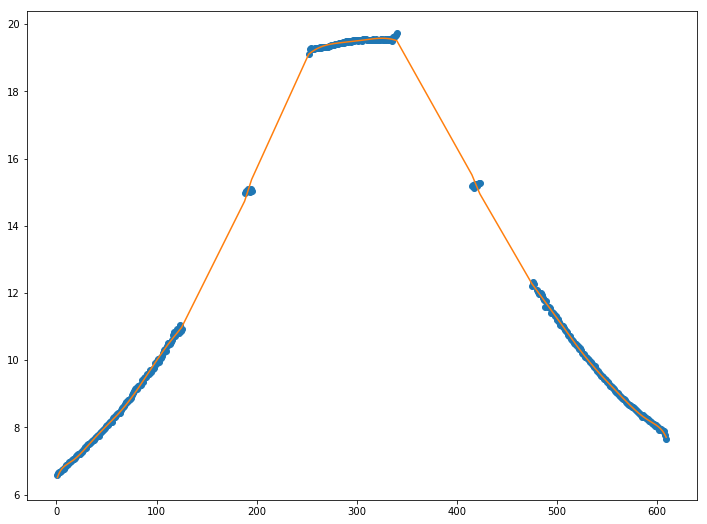

In [142]:

coefs = poly.polyfit(temp[0, mask], temp[1, mask], 17)
ffit = poly.polyval(temp[0, mask], coefs)
plt.figure(figsize=(12, 9))
plt.plot(temp[0, mask], temp[1, mask], 'o', temp[0, mask], ffit, '-');

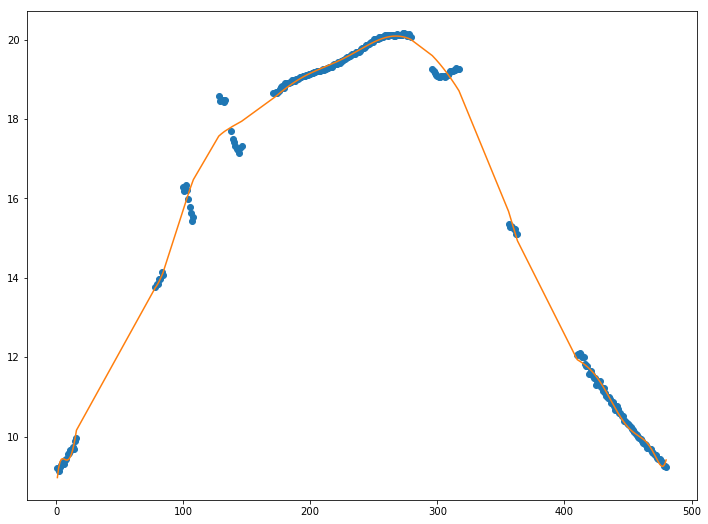

In [148]:
temp = np.array([np.arange(1, len(image[239,:])+1), image[239, :]])
mask = temp[1, :]!=0
# temp
coefs = poly.polyfit(temp[0, mask], temp[1, mask], 17)
ffit = poly.polyval(temp[0, mask], coefs)
plt.figure(figsize=(12, 9))
plt.plot(temp[0, mask], temp[1, mask], 'o', temp[0, mask], ffit, '-');